### USED CARS DATASET

Over a million and a half unique car postings between the months of September and November of 2018 (Craiglist)

Data source: https://www.kaggle.com/austinreese/craigslist-carstrucks-data



### Importing needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#import geopandas as gpd
#import squarify

pd.set_option('display.max_columns', 100) #to see all colummns of Df

### Reading file

In [2]:
df = pd.read_csv('craigslistVehiclesFull.csv')

### Exploring data

In [3]:
df.head(5)

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,automatic,NaN,rwd,NaN,coupe,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,automatic,1FAFP55UO4G113464,fwd,full-size,sedan,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00n0n_bJJ1XnonSG...,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


### Keeping only needed data
Features considered to be needed for analysis:

**City** - location where car is being sold

**price**- price at which car is being sold

**year** - year when car was manufactured

**manufactrurer** - car manufacturers name

**cylinders** - number of cylinders in car

**fuel** - fuel type of a car

**odometer** - distance car driven in miles 

**transmission** - car transmission type

**paint_color** - car paint color

**county_name** - county name where car is being sold

**state_name** - state name where car is being sold


In [4]:
df = df[['city','price','year','manufacturer','cylinders','fuel','odometer','transmission','paint_color','county_name','state_name' ]]

### Exploring data types

In [6]:
df.dtypes

city             object
price             int64
year            float64
manufacturer     object
cylinders        object
fuel             object
odometer        float64
transmission     object
paint_color      object
county_name      object
state_name       object
dtype: object

- Most data is categorical, nominal (City, Manufacturer, Transmission, cylinders,paint_color, county_name, state_name)
- The rest is numumerical, continuous (Price, Year, Odometer)

### How big is dataset?

In [7]:
df.shape

(1723065, 11)

### 1,723,065 cars

### Checking for missing data?

In [8]:
df.isnull().sum()

city                 0
price                0
year              6315
manufacturer    136414
cylinders       691291
fuel             10367
odometer        564054
transmission      9022
paint_color     695650
county_name      58833
state_name           0
dtype: int64

### Remove instances with missing values of Year & Manufacturer.

In [9]:
df = df.dropna(subset=['year','manufacturer'])

In [10]:
df.shape

(1581344, 11)

Removed instances with missing values of Year & Manufacturer. Why? Because this data is crucial in predicting price of car

#### Dataset of 1,581,344 cars left

### Removing duplicates if any? Any Corrupted Data?

In [11]:
df[df.duplicated(['city','price','year','odometer','manufacturer','cylinders','transmission','paint_color','county_name','state_name'])]

,city,price,year,manufacturer,cylinders,fuel,odometer,transmission,paint_color,county_name,state_name
85,whistler,26880,2016.0,chrysler,NaN,gas,49000.0,automatic,NaN,NaN,FAILED
87,whistler,17990,2010.0,toyota,NaN,hybrid,117000.0,automatic,NaN,NaN,FAILED
88,whistler,15890,2010.0,audi,NaN,gas,188000.0,automatic,NaN,NaN,FAILED
90,whistler,8800,2007.0,nissan,NaN,gas,163000.0,automatic,NaN,NaN,FAILED
93,whistler,13890,2014.0,subaru,NaN,gas,78000.0,automatic,NaN,NaN,FAILED
95,whistler,18990,2010.0,audi,NaN,gas,152000.0,automatic,NaN,NaN,FAILED
232,hat,41989,2016.0,gmc,8 cylinders,gas,49243.0,automatic,silver,NaN,FAILED
264,nd,1000,2006.0,acura,NaN,gas,NaN,automatic,NaN,McLean,North Dakota
291,nd,13000,2011.0,honda,NaN,gas,NaN,automatic,NaN,Mountrail,North Dakota
335,csd,24900,1967.0,chevy,NaN,gas,NaN,manual,NaN,Kendall,Illinois


Are these duplicate values? Drop duplicates

### Remove duplicates

In [12]:
df = df.drop_duplicates()
df.shape

(1361323, 11)

### Renaming some labels 

In [13]:
df['manufacturer'].unique()

array(['dodge', 'ford', 'gmc', 'jeep', 'bmw', 'chev', 'chevrolet',
       'hyundai', 'honda', 'ram', 'acura', 'kia', 'volkswagen', 'nissan',
       'audi', 'mercedes-benz', 'subaru', 'chrysler', 'toyota', 'rover',
       'mazda', 'chevy', 'cadillac', 'mercedes', 'infiniti', 'lexus',
       'mini', 'saturn', 'vw', 'lincoln', 'mitsubishi', 'buick',
       'mercury', 'fiat', 'pontiac', 'volvo', 'jaguar', 'datsun',
       'infinity', 'ferrari', 'harley', 'alfa', 'porche', 'noble',
       'land rover', 'landrover', 'harley-davidson', 'alfa-romeo',
       'mercedesbenz', 'aston', 'aston-martin', 'morgan', 'hennessey'],
      dtype=object)

In [14]:
df['manufacturer'] = df['manufacturer'].replace({'chev': 'chevrolet', 
                                                 'vw': 'volkswagen', 'infinity': 'infiniti', 
                                                 'land rover': 'rover', 'landrover':'rover',
                                                'aston':'aston-martin', 'mercedesbenz':'mercedes-benz',
                                                 'mercedes':'mercedes-benz','alfa':'alfa-romeo','chevy':'chevrolet'
                                                })

### Droping motorcycles from the list

In [16]:
df.drop( df[ df['manufacturer'] == 'harley'].index , inplace=True)
#Harley is not a car

In [17]:
df.drop( df[ df['manufacturer'] == 'harley-davidson'].index , inplace=True)
#Harley-davidson is not a car

In [18]:
df.shape

(1360600, 11)

## Explorig numerical data Years & Price 

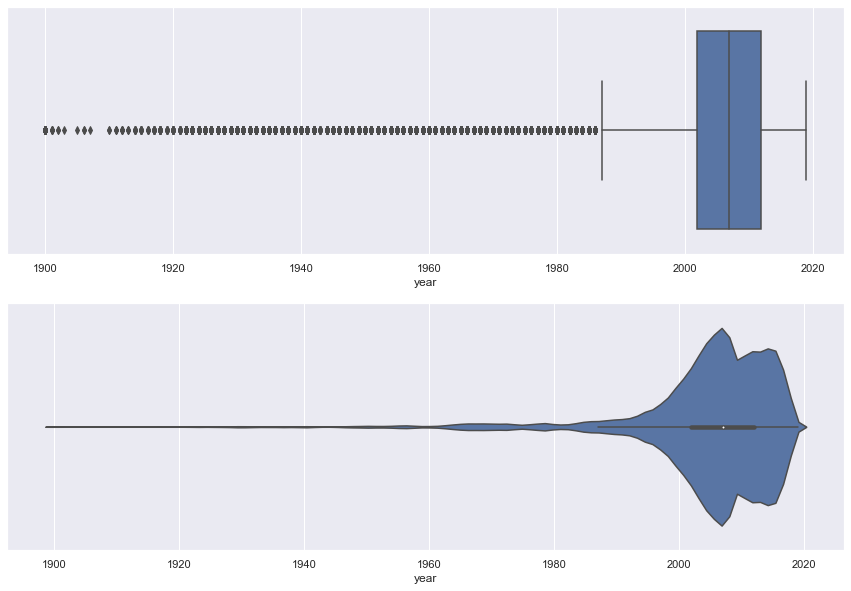

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x='year', data=df)
plt.subplot(2,1,2)
sns.violinplot(x='year', data=df)

Seems worth to get rid of cars older than 1960

### Cars from 1961 up to now

In [26]:
df = df[df['year'] > 1960] #Keeping only cars older than 1960 make

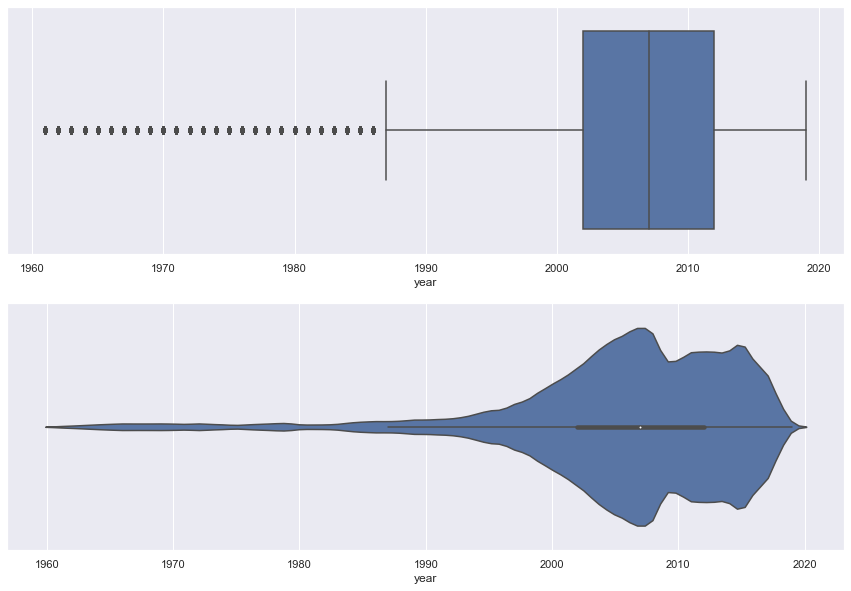

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x='year', data=df)
plt.subplot(2,1,2)
sns.violinplot(x='year', data=df)

In [29]:
#Cars left in dataset
df.shape

(1344469, 11)

## Price range illustration using Boxplot

Seems too many outliers, reducing size to keep only cars < $500,000

In [33]:
#Getting rid of outlicers above 500,000$ 
df = df[df['price'] < 500000]

In [34]:
df.shape

(1343971, 11)

### Price range of cars below $500,000

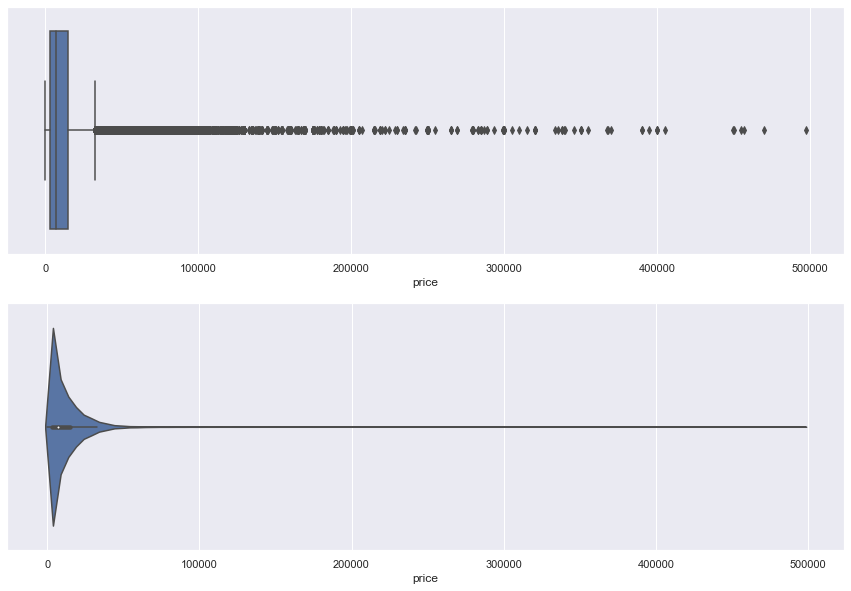

In [39]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x='price', data=df, ) 
plt.subplot(2,1,2)
sns.violinplot(x='price', data=df,) 

Still seems to be too many outliers, will keep only cars below $100,000

In [41]:
df = df[df['price'] < 100000] #Keeping only cars older than 1960 make
df.shape

(1342901, 11)

### Price range of cars below $100,000

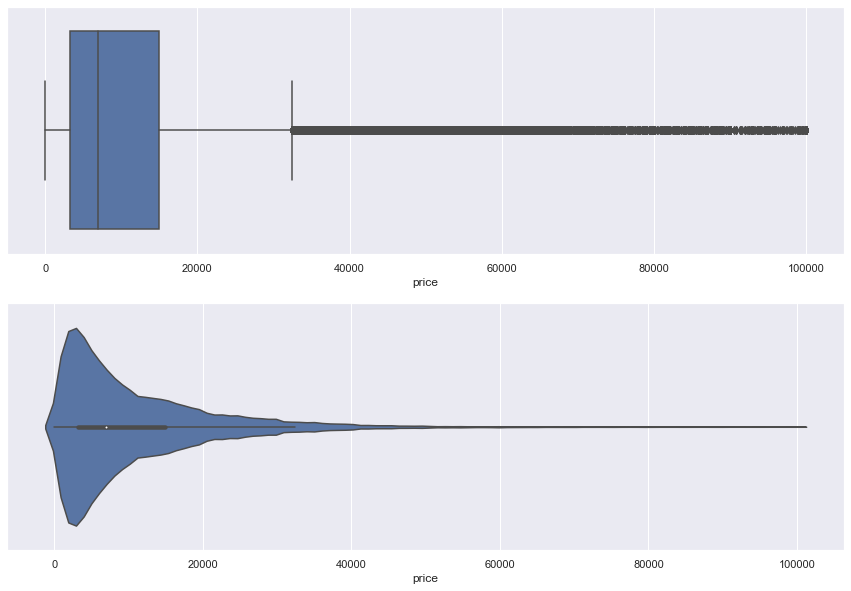

In [42]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x='price', data=df, ) #showfliers=False ) 
plt.subplot(2,1,2)
sns.violinplot(x='price', data=df,) #showfliers=False) 

### Cars quantities by city

In [43]:
cities = df['city'].value_counts()

In [44]:
cities.count()

469

Text(0.5, 1.0, 'Used cars for sale by City, US')

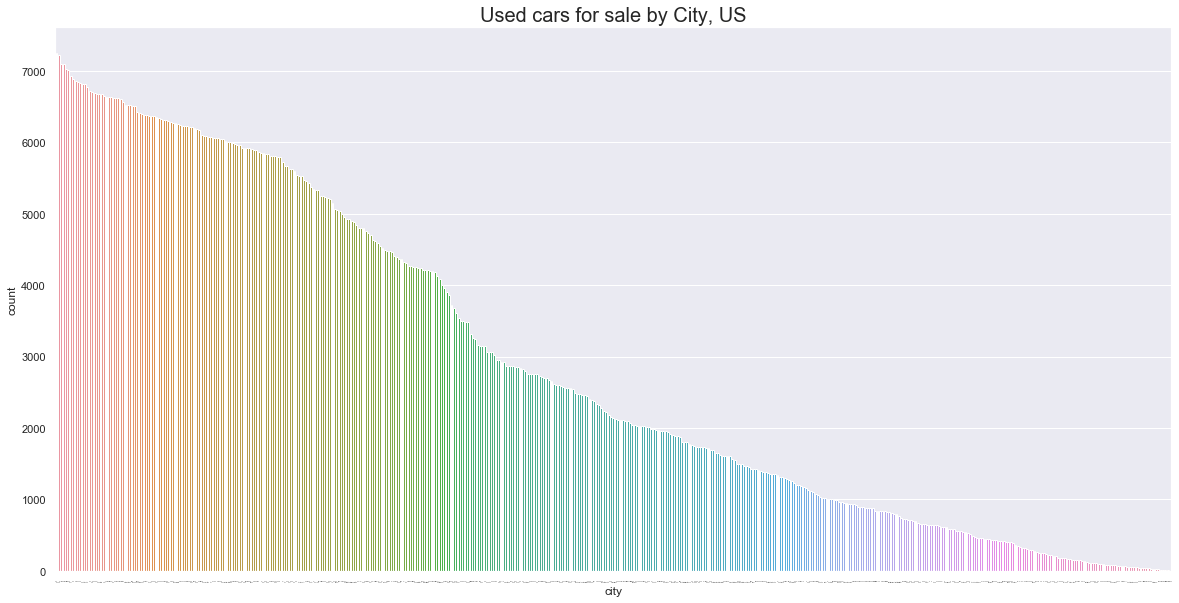

In [45]:
plt.figure(figsize=(20,10))
#sns.countplot(cities)
ax = sns.countplot(x='city',data=df,order=df['city'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), fontsize=0);
ax.set_title('Used cars for sale by City, US', fontsize=20)

### Top 10 cities with most cars

In [46]:
cities.head(10)

sfbay          7247
sacramento     7223
cosprings      7096
grandrapids    7095
vancouver      7027
minneapolis    7007
portland       6921
orlando        6890
boise          6860
nashville      6839
Name: city, dtype: int64

### Cars quantities by state

In [47]:
states = df['state_name'].value_counts()
states.count()

52

In [48]:
states.head()

California    115355
Florida        83434
Texas          75338
Michigan       64367
New York       55689
Name: state_name, dtype: int64

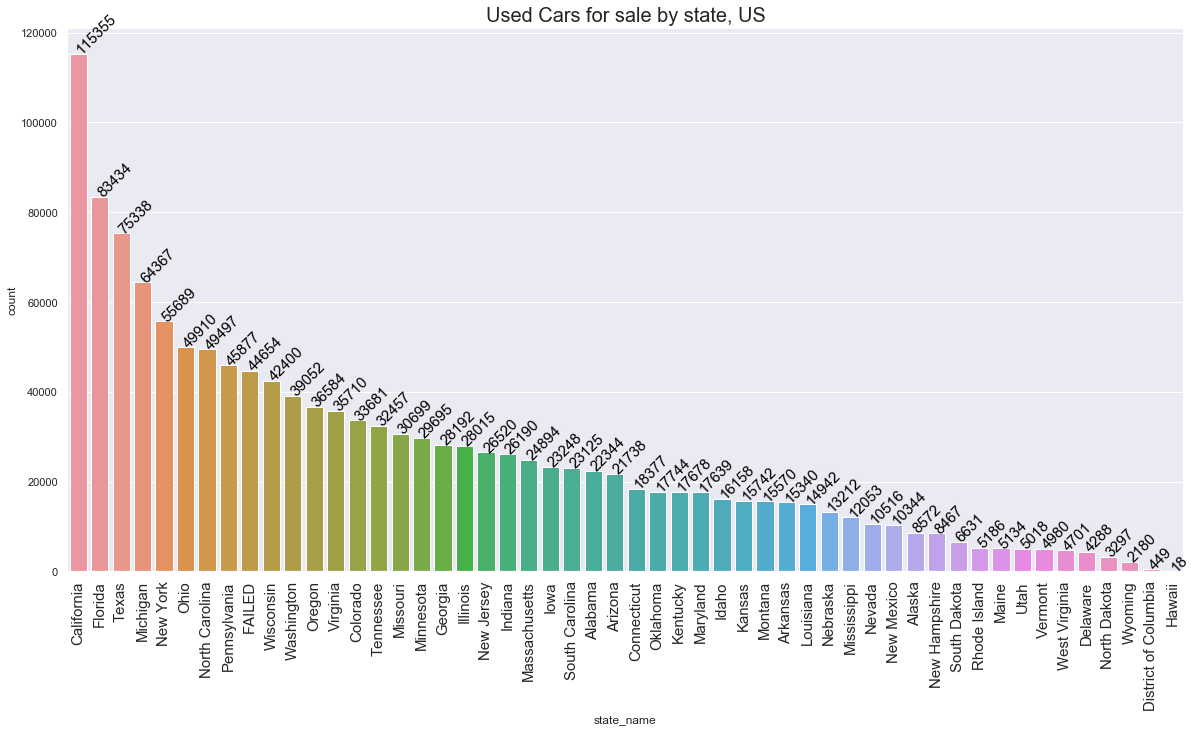

In [49]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='state_name',data=df,order=df['state_name'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=15);
ax.set_title("Used Cars for sale by state, US", fontsize=20)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black', rotation=45)

### Car manufacture Years on sale 

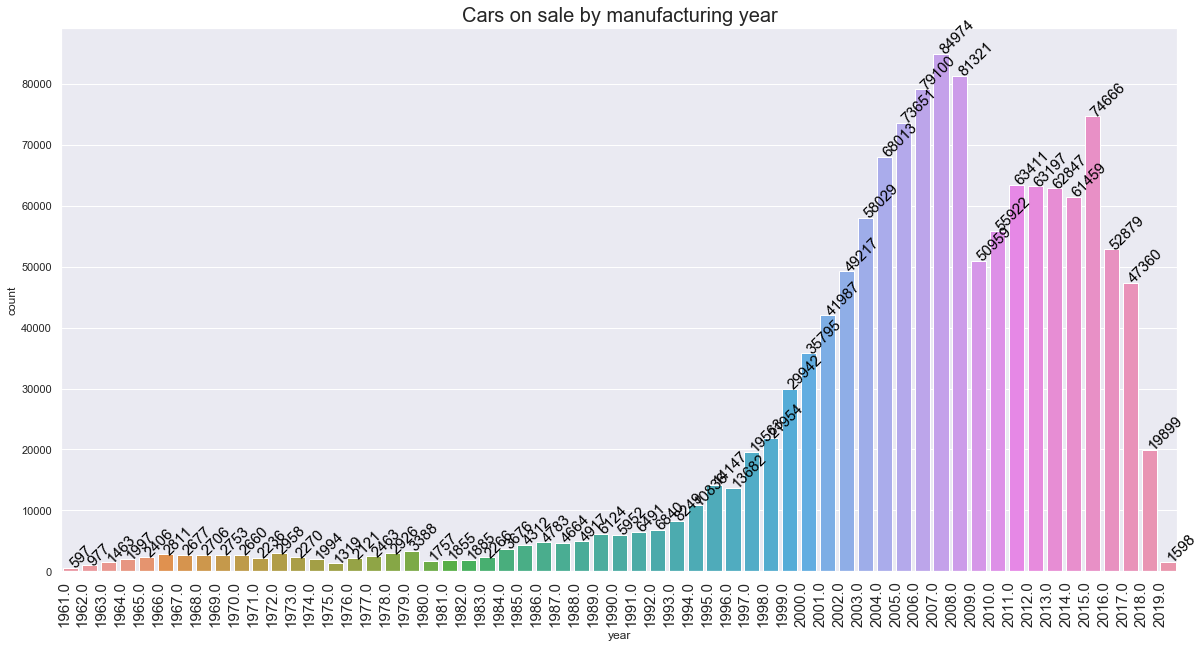

In [50]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='year',data=df,) #order=df.year.value_counts().iloc[:-50].index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15);
ax.set_title('Cars on sale by manufacturing year', fontsize=20)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black', rotation=45)

### Top car manufacturers

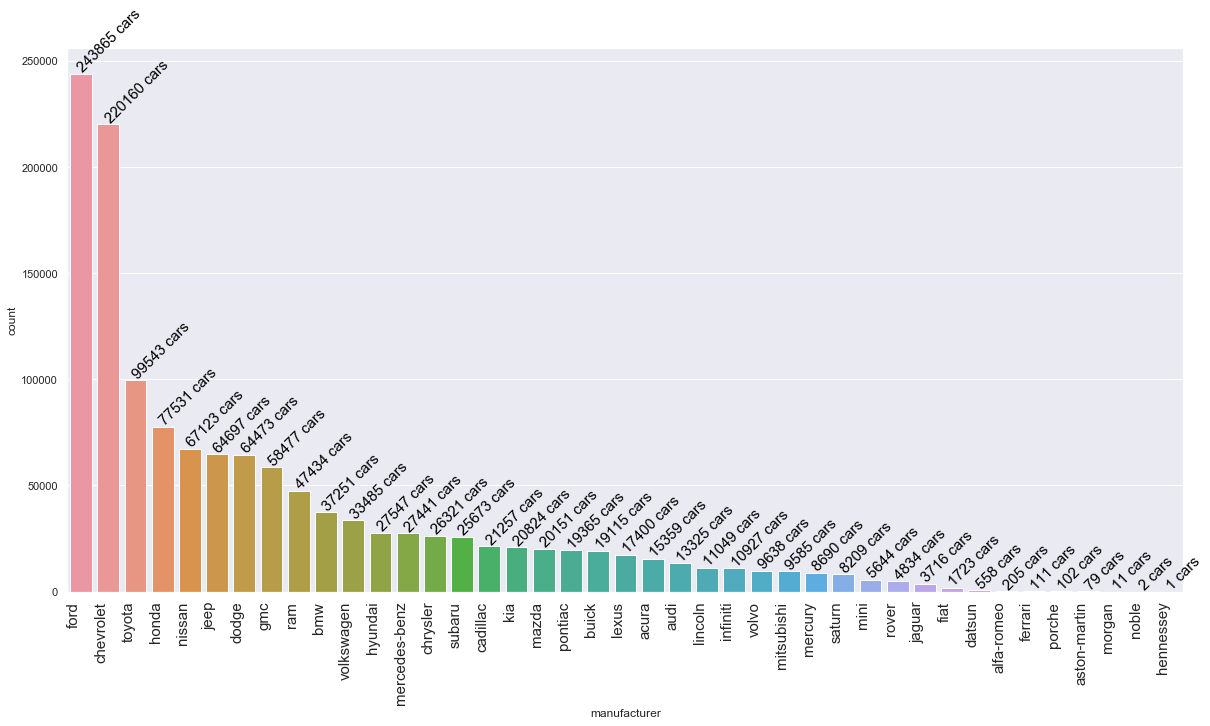

In [51]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='manufacturer',data=df, order=df.manufacturer.value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15);


# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()+1000, \
            str(round((i.get_height()), 2))+' cars', fontsize=15, color='black', rotation=45)
    

In [52]:
df['manufacturer'].value_counts().head(10)

ford         243865
chevrolet    220160
toyota        99543
honda         77531
nissan        67123
jeep          64697
dodge         64473
gmc           58477
ram           47434
bmw           37251
Name: manufacturer, dtype: int64

### Car manufacturers avg price per car

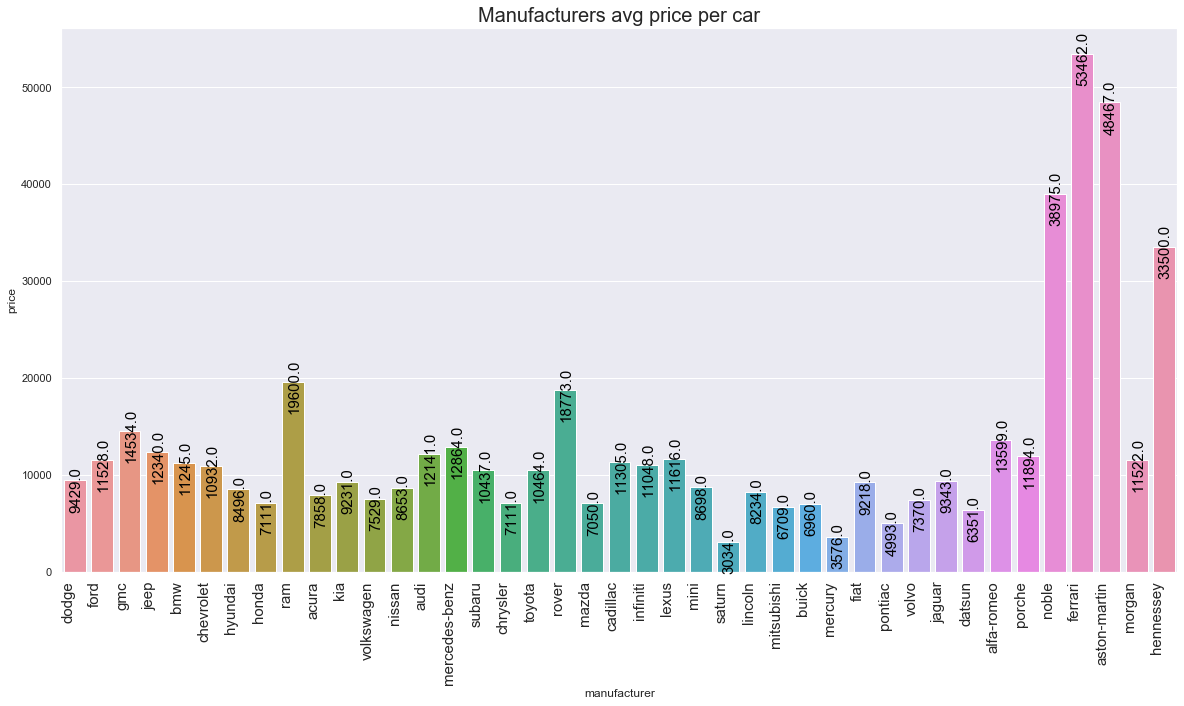

In [53]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='manufacturer', y='price', data=df,ci=None);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15,);
ax.set_title('Manufacturers avg price per car', fontsize=20)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()-3000, \
            str(round((i.get_height()),)), fontsize=15, color='black', rotation=90)
    

### Car avg price per car manufacturing year

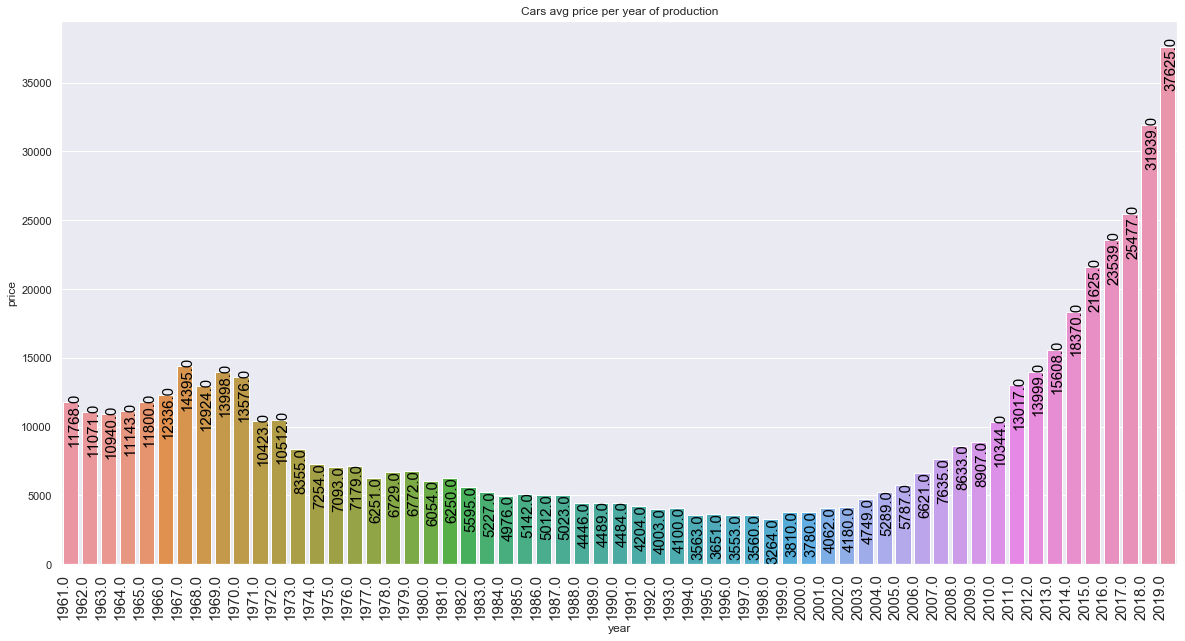

In [54]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='year', y='price', data=df,ci=None);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15);
ax.set_title('Cars avg price per year of production')

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()-3000, \
            str(round((i.get_height()),)), fontsize=15, color='black', rotation=90)

### Top car colours

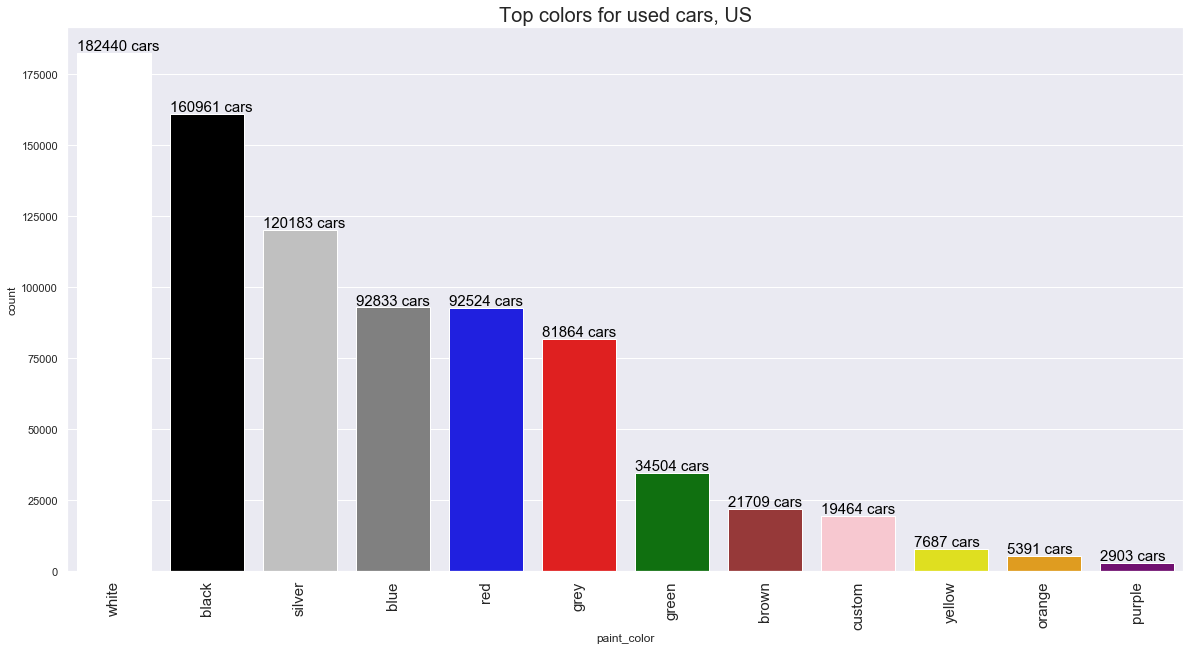

In [55]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='paint_color',data=df,order=df['paint_color'].value_counts().index, 
                   palette=["white", "black",'silver', 'grey', 'blue', 'red', 'green', 'brown','pink','yellow','orange','purple']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=15);
ax.set_title("Top colors for used cars, US", fontsize=20)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+1000, \
            str(round((i.get_height()), 2))+' cars', fontsize=15, color='black',)
                

### Avg prices per colors

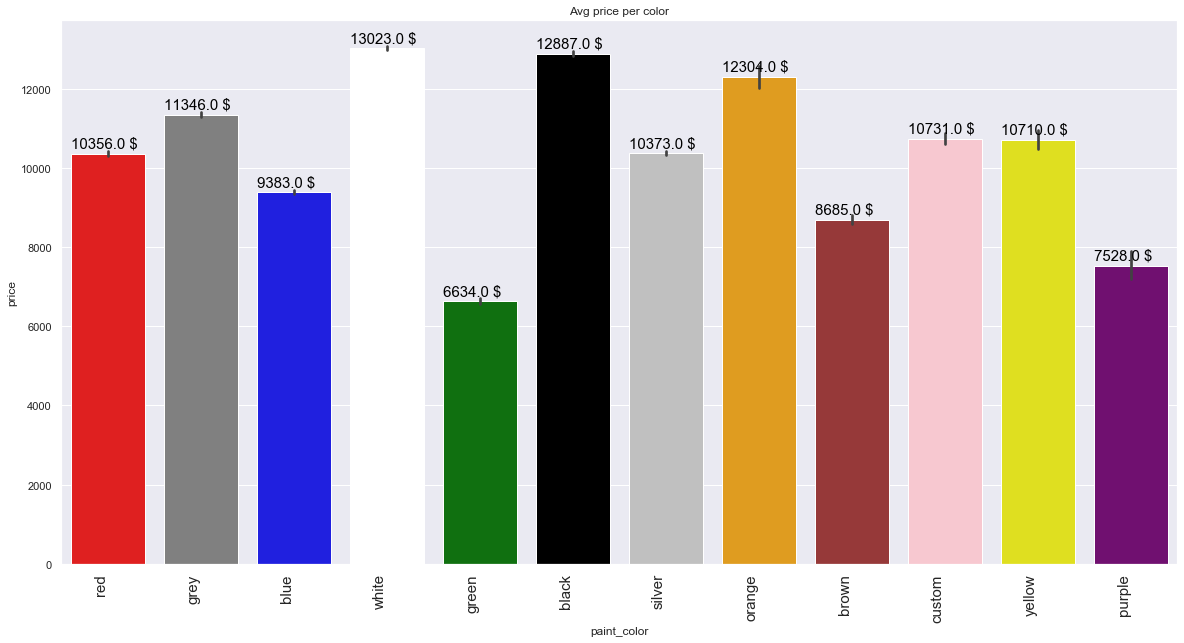

In [57]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='paint_color', y='price', data=df,
                palette=["red", "grey",'blue', 'white', 'green', 'black', 'silver', 'orange','brown','pink','yellow','purple']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=15);
ax.set_title('Avg price per color')


# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+150, \
            str(round((i.get_height()),))+' $', fontsize=15, color='black',)

### Cars by transmission type

Text(0.5, 1.0, 'Cars by Transmission type')

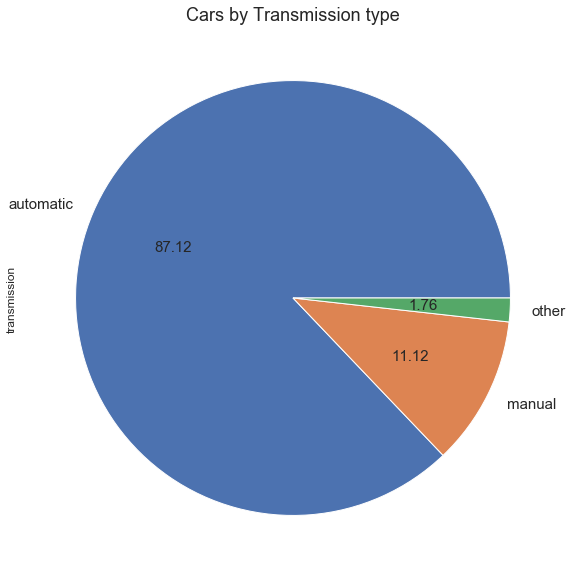

In [58]:
plt.figure(figsize=(20,10))
df['transmission'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("Cars by Transmission type", fontsize=18 )

### Odometer data (In Miles)

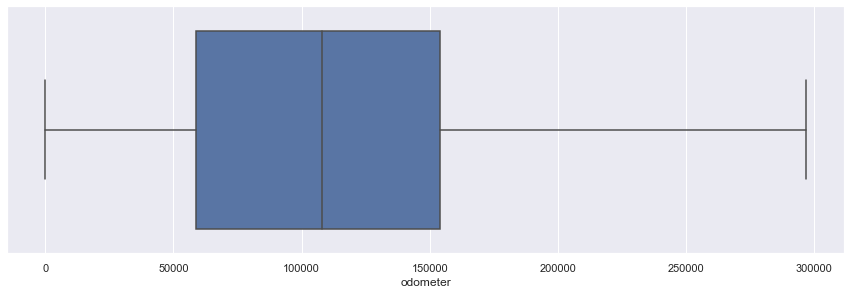

In [62]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x='odometer', data=df, showfliers=False) 

### Feature Engineering Foreign vs American

In [63]:
americancars = ['dodge', 'chevrolet','ram','ford', 'chrysler', 'saturn', 'gmc', 'cadillac',  'lincoln', 'buick', 'mercury','jeep', ]    
    
def alocation(x):
    if x in americancars:
        return "Local"
    else:
        return 'Foreign'

In [64]:
df['Foreign vs Local'] = df['manufacturer'].apply(alocation)

### Foreign vs American cars

Text(0.5, 1.0, 'Local cars % vs Foreign cars %')

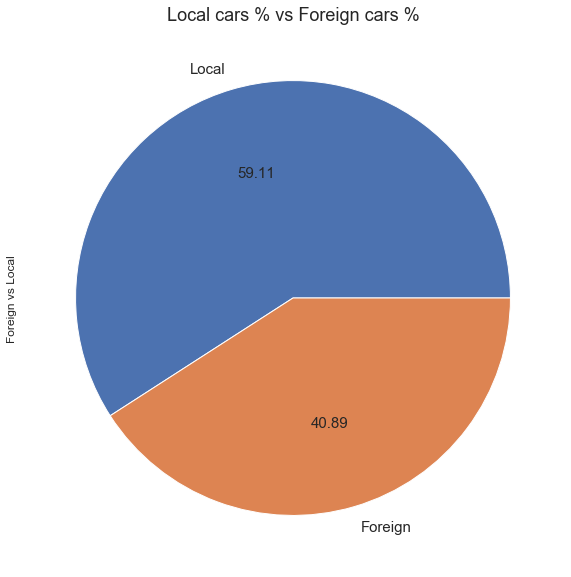

In [65]:
plt.figure(figsize=(20,10))
df['Foreign vs Local'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("Local cars % vs Foreign cars %", fontsize=18 )

### Cars by cylinders

In [90]:
df['cylinders'] = df['cylinders'].astype(str).map(lambda x: x.rstrip('cylinders'))
df.drop( df[ df['cylinders'] == 'oth'].index , inplace=True)
df.drop( df[ df['cylinders'] == 'na'].index , inplace=True)
df['cylinders'] = df['cylinders'].astype(int)
df['cylinders'].unique()

array([ 6,  8,  4, 10,  5, 12,  3], dtype=int64)

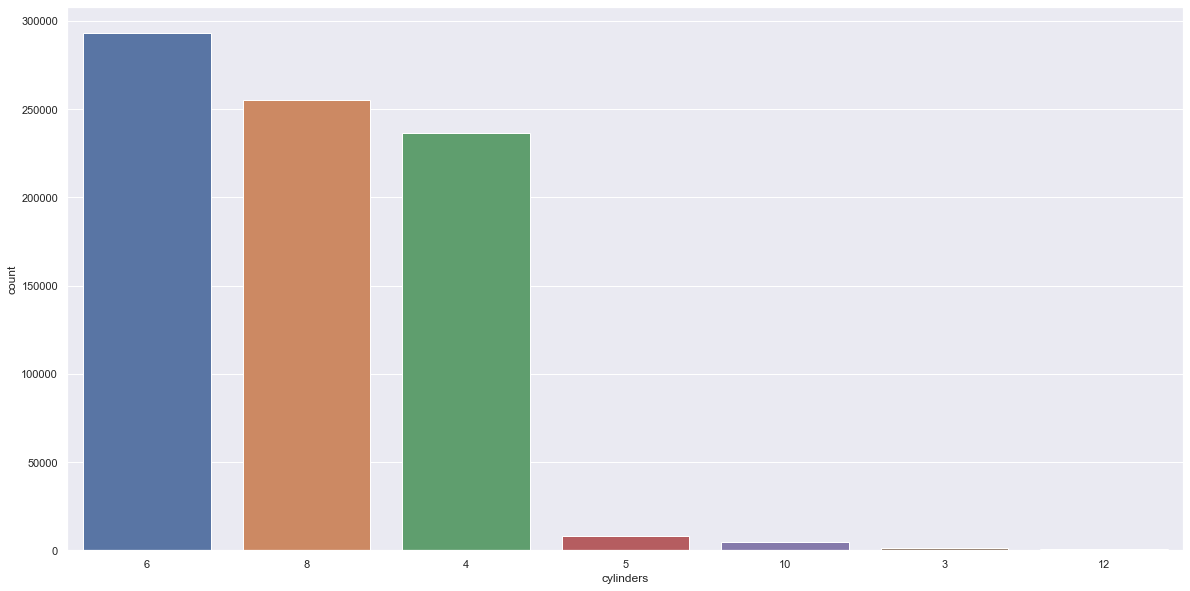

In [93]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='cylinders',data=df, order=df.cylinders.value_counts().index);

# Questions to answer


1. Price range illustration using Boxplot? To see preliminary highs, lows and averages 
2. Illustarte cars count by cities (SNS.countplot)
2b. Cars by state?
3. Car manufacturing year counts/yaars (SNS countplot)
3b. Manufacturing year/avgs prices
4. Car count/manufacturer (sns.countplot)
5. Car manufacturer/average price
6. American vs Foreign cars/ by states.
7. Vehicles colour counts
8. Avg. vehicle prices per color?
9. Cars by gear type in %? Are automatic or Manual more popular?
10. Odometer statistics, averages? 
11. cars by cyclinders?



Missing data?+
Duplicates??+-
Corrupted Data?? +-
Outliers? Get rid of them and why? +
What features are existing?+
Can we engineer some data?+
Dates are good source, day of week, hours, months etc? (N/A)


Correlation between variables? Maybe some need to be excluded?
ML model will give a slight bonus (Which ML model to use for price prediction?) 

# Apply basic ML to predict car prices

In [94]:
#Choosing right features for price prediction
df.head()

,city,price,year,manufacturer,cylinders,fuel,odometer,transmission,paint_color,county_name,state_name,Foreign vs Local
0,marshall,11900,2010.0,dodge,6,gas,43600.0,automatic,red,Lincoln,South Dakota,Local
3,marshall,2800,2004.0,ford,6,gas,168591.0,automatic,grey,Osceola,Iowa,Local
5,marshall,9900,2007.0,gmc,8,gas,169000.0,automatic,NaN,Lincoln,South Dakota,Local
6,marshall,12500,2015.0,jeep,4,gas,39500.0,automatic,grey,Minnehaha,South Dakota,Local
9,soo,12995,2003.0,ford,10,gas,236000.0,automatic,blue,NaN,FAILED,Local


In [ ]:
# features = ['year','manufacturer','fuel','odometer', 'transmission']

#### Removing instances where any of the values is missing in the selected features - because it's important in price prediction.

In [95]:
df.isnull().sum()

city                     0
price                    0
year                     0
manufacturer             0
cylinders                0
fuel                  4145
odometer            162187
transmission           153
paint_color         135932
county_name          25895
state_name               0
Foreign vs Local         0
dtype: int64

In [96]:
df = df.dropna(subset=['fuel','odometer','transmission'])
df.shape #762,552 still decent data size

(632778, 12)

### Turninig some categorical values to numericals with One Hot encoding

### Fuel

In [97]:
df['fuel'].unique()

array(['gas', 'diesel', 'hybrid', 'other', 'electric'], dtype=object)

In [98]:
#Drop others
df.drop( df[ df['fuel'] == 'other'].index , inplace=True)

In [99]:
df['fuel'].unique()

array(['gas', 'diesel', 'hybrid', 'electric'], dtype=object)

In [100]:
# Assign numerical values to 4 types (One Hot Encoding, using Pandas)
df['fuel'] = pd.Categorical(df['fuel'])

In [102]:
dfDummies = pd.get_dummies(df['fuel'], prefix = 'fuel')

In [103]:
dfDummies.head()

,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid
0,0,0,1,0
3,0,0,1,0
5,0,0,1,0
6,0,0,1,0
9,0,0,1,0


In [105]:
df = pd.concat([df, dfDummies], axis=1)
df.head()

,city,price,year,manufacturer,cylinders,fuel,odometer,transmission,paint_color,county_name,state_name,Foreign vs Local,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid
0,marshall,11900,2010.0,dodge,6,gas,43600.0,automatic,red,Lincoln,South Dakota,Local,0,0,1,0,0,0,1,0
3,marshall,2800,2004.0,ford,6,gas,168591.0,automatic,grey,Osceola,Iowa,Local,0,0,1,0,0,0,1,0
5,marshall,9900,2007.0,gmc,8,gas,169000.0,automatic,NaN,Lincoln,South Dakota,Local,0,0,1,0,0,0,1,0
6,marshall,12500,2015.0,jeep,4,gas,39500.0,automatic,grey,Minnehaha,South Dakota,Local,0,0,1,0,0,0,1,0
9,soo,12995,2003.0,ford,10,gas,236000.0,automatic,blue,NaN,FAILED,Local,0,0,1,0,0,0,1,0


### Transmission

In [106]:
#drop instances with value - Other
#Turn automatic - 1, Manual - 2
df['transmission'].unique()

array(['automatic', 'other', 'manual'], dtype=object)

In [107]:
#Drop other
df.drop( df[ df['transmission'] == 'other'].index , inplace=True)

In [108]:
df['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

In [109]:
df['transmission'] = pd.Categorical(df['transmission'])
dfDummies2 = pd.get_dummies(df['transmission'], prefix = 'transmission')
df = pd.concat([df, dfDummies2], axis=1)
df.head()

,city,price,year,manufacturer,cylinders,fuel,odometer,transmission,paint_color,county_name,state_name,Foreign vs Local,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,transmission_automatic,transmission_manual
0,marshall,11900,2010.0,dodge,6,gas,43600.0,automatic,red,Lincoln,South Dakota,Local,0,0,1,0,0,0,1,0,1,0
3,marshall,2800,2004.0,ford,6,gas,168591.0,automatic,grey,Osceola,Iowa,Local,0,0,1,0,0,0,1,0,1,0
5,marshall,9900,2007.0,gmc,8,gas,169000.0,automatic,NaN,Lincoln,South Dakota,Local,0,0,1,0,0,0,1,0,1,0
6,marshall,12500,2015.0,jeep,4,gas,39500.0,automatic,grey,Minnehaha,South Dakota,Local,0,0,1,0,0,0,1,0,1,0
9,soo,12995,2003.0,ford,10,gas,236000.0,automatic,blue,NaN,FAILED,Local,0,0,1,0,0,0,1,0,1,0


#### Manufacturers

In [110]:
#A lot of variations? 
#df['manufacturer'].unique()

In [111]:
#df['manufacturer'] = pd.Categorical(df['manufacturer'])
#dfDummies3 = pd.get_dummies(df['manufacturer'], prefix = 'make')
#df = pd.concat([df, dfDummies3], axis=1)

In [114]:
# analysing only 'Ford' due to memory erros
df = df[df['manufacturer'] == 'ford']

In [115]:
df.shape

(111364, 22)

In [116]:
#'make_acura','make_alfa-romeo','make_aston-martin','make_audi','make_bmw','make_buick',
            #'make_cadillac','make_chevrolet','make_chrysler','make_datsun','make_dodge','make_ferrari',
            #'make_fiat','make_ford','make_gmc','make_hennessey','make_honda','make_hyundai','make_infiniti',
            #'make_jaguar','make_jeep','make_kia','make_lexus','make_lincoln','make_mazda','make_mercedes-benz',
            #'make_mercury','make_mini','make_mitsubishi','make_morgan','make_nissan','make_noble','make_pontiac',
            #'make_porche','make_ram','make_rover','make_saturn','make_subaru','make_toyota','make_volkswagen', 'make_volvo'
#'fuel_diesel','fuel_electric', 'fuel_gas', 'fuel_hybrid','transmission_automatic', 'transmission_manual',

features = ['year','odometer' ]
X = df[features]

In [117]:
#Price is piece we expect to predict
y = df['price']

In [118]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=1) 

### KNN Model

In [119]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [120]:
knn.fit(train_X,train_y)
predictions = knn.predict(test_X)
knn.score(test_X, test_y)
#shows low score, but we don't expect high, as 100% accuracy in price doesnt matter, matters close one.

0.14669013325670774

In [121]:
testdf = pd.concat([test_X, test_y], axis=1)
testdf.head(10)

,year,odometer,price
343393,2006.0,142000.0,3500
661389,2009.0,154000.0,2995
212973,2003.0,174000.0,3500
848948,2015.0,85585.0,24995
1546736,2005.0,144000.0,5000
105068,1995.0,205000.0,1200
293867,2011.0,110000.0,11500
1191728,2008.0,109099.0,5485
1429117,2004.0,268381.0,9995
1234698,2004.0,146000.0,1500


In [122]:
knn.predict(test_X.head(10))

array([ 2300,  9000,  9500,  7995, 13750,  7500,  3990,  5485,  9995,
        1550], dtype=int64)

In [123]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = knn.predict(test_X.head(10))
mean_absolute_error(test_y.head(10), predicted_home_prices)

5281.5

### Decision tree Model

In [124]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
dc_model = DecisionTreeRegressor(random_state=3)

# Fit model
dc_model.fit(train_X, train_y)
dc_model.score(test_X, test_y)

0.4320478579930298

In [125]:
test_y.head(10)

343393      3500
661389      2995
212973      3500
848948     24995
1546736     5000
105068      1200
293867     11500
1191728     5485
1429117     9995
1234698     1500
Name: price, dtype: int64

In [126]:
dc_model.predict(test_X.head(10))

array([ 5204.89473684,  7100.        ,  4898.07692308, 55000.        ,
        6936.8125    ,  7500.        , 11478.6875    ,  5485.        ,
        9995.        ,  8024.3       ])

In [127]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = dc_model.predict(test_X.head(10))
mean_absolute_error(test_y.head(10), predicted_home_prices)

5199.539665991903

### Lasso Model

In [128]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(train_X, train_y)
clf.score(test_X, test_y)

0.22260096924031925

In [129]:
clf.predict(test_X.head(10))

array([11482.01633573, 12949.0385435 ,  9622.57103353, 16707.30523795,
       10939.49669299,  5148.63329124, 14390.82609664, 12824.8151633 ,
        9305.49680663, 10396.97705025])

In [130]:
test_y.head(10)

343393      3500
661389      2995
212973      3500
848948     24995
1546736     5000
105068      1200
293867     11500
1191728     5485
1429117     9995
1234698     1500
Name: price, dtype: int64

In [131]:
predicted_home_prices = clf.predict(test_X.head(10))
mean_absolute_error(test_y.head(10), predicted_home_prices)

6205.1572162616885

### SGD Regresson model

In [132]:
from sklearn import linear_model
sgdmodel = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
sgdmodel.fit(train_X, train_y)
sgdmodel.score(test_X, test_y)

-3.1817298754333594e+29

In [133]:
sgdmodel.predict(test_X.head(10))

array([-4.30156386e+18, -4.65839091e+18, -5.25266104e+18, -2.62495826e+18,
       -4.36097482e+18, -6.17383193e+18, -3.35054698e+18, -3.32364382e+18,
       -8.05822837e+18, -4.42038577e+18])

In [134]:
predicted_home_prices = sgdmodel.predict(test_X.head(10))
mean_absolute_error(test_y.head(10), predicted_home_prices)

4.652518575114697e+18

### Ridge Regression

In [135]:
from sklearn.linear_model import Ridge
ridgemodel = Ridge(alpha=1.0)
ridgemodel.fit(train_X, train_y) 
ridgemodel.score(test_X, test_y)

0.22260096017151743

In [136]:
ridgemodel.predict(test_X.head(10))

array([11482.01651295, 12949.04191165,  9622.56836822, 16707.31425619,
       10939.49585407,  5148.62261563, 14390.83118033, 12824.81714394,
        9305.49592064, 10396.9751952 ])

In [137]:
test_y.head(10)

343393      3500
661389      2995
212973      3500
848948     24995
1546736     5000
105068      1200
293867     11500
1191728     5485
1429117     9995
1234698     1500
Name: price, dtype: int64

In [138]:
predicted_home_prices = ridgemodel.predict(test_X.head(10))
mean_absolute_error(test_y.head(10), predicted_home_prices)

6205.155860517698